In [2]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_phase_space/symmetric/results'
    tline_path = extSSDpath + getProjectFoldername() + '/det_sols_from_polynomial/res_files'
else:
    print('CAREFUL! NO EXTERNAL SSD!')
    path = './results'
    tline_path = '../../det_sols_from_polynomial/res_files'

In [9]:
model = 'Galla'
q1, q2, ic, N = 7.5, 10.0, 'N', 100

mesh_file = f'q1_{q1}_q2_{q2}_phase_space_{model}_ic_{ic}_Nbots_{N}.npz'
mesh = np.load(f'{path}/{mesh_file}')

In [10]:
mesh['y']

array([[0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       [0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]])

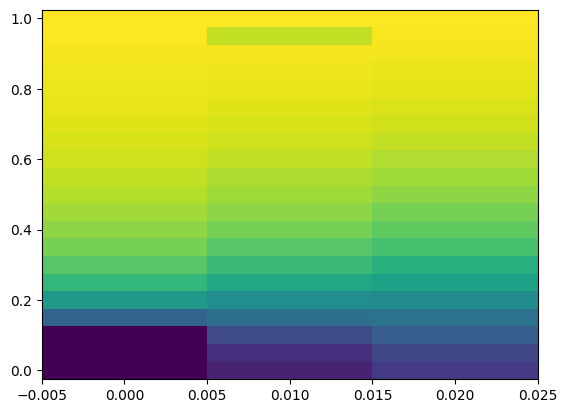

In [11]:
fig, ax = plt.subplots()
ax.pcolormesh(mesh['x'], mesh['y'], mesh['fs'][2])

In [8]:
mesh['fs'][2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.08518244, 0.12410938, 0.19791617, 0.32291178, 0.43431896,
        0.54070699, 0.61139321, 0.66799281, 0.71218762, 0.74306507,
        0.77355489, 0.79140639, 0.80898483, 0.82791377, 0.84287784,
        0.85635449, 0.86598683, 0.87613613, 0.88476607, 0.82850659,
        0.        ],
       [0.1485002 , 0.19286946, 0.25764232, 0.34734052, 0.42506387,
        0.50832295, 0.57577884, 0.63422635, 0.67746307, 0.71846826,
        0.74700998, 0.77271776, 0.79410858, 0.81589022, 0.8295014 ,
        0.84680599, 0.85861477, 0.8695006 , 0.8823485 , 0.85736846,
        0.        ]])